In [32]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [16]:
# normalise
train_images = train_images / 255.0
test_images = test_images / 255.0

9


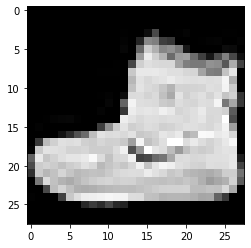

In [17]:
plt.imshow(train_images[0], cmap="gray")
print(train_labels[0])

In [42]:
class StopModelCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= 0.9:
            print("\nReached 95% accuracy... stopping training")
            self.model.stop_training = True

callbacks = StopModelCallback()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.optimizers.Adam(), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=15, callbacks=[callbacks])

Epoch 1/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4728 - accuracy: 0.8301
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3585 - accuracy: 0.8693
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3216 - accuracy: 0.8816
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2987 - accuracy: 0.8892
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2785 - accuracy: 0.8964
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2626 - accuracy: 0.9022

Reached 95% accuracy... stopping training


In [43]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3391 - accuracy: 0.8810


[0.3391101360321045, 0.8809999823570251]

In [33]:
classifications = model.predict(test_images)

print(classifications[0])
print(np.argmax(classifications[0]))

[1.7080143e-06 1.2223369e-06 3.4914791e-07 2.2084951e-08 1.6208364e-10
 1.7469605e-04 5.6625698e-08 3.4590003e-03 3.1453550e-07 9.9636263e-01]
9


In [30]:
print(test_labels[0])

9


In [44]:
len(train_images)

60000

In [45]:
len(test_labels)

10000